# 1 Import Necessary Libraries

In [1]:
pip install statsmodels --upgrade


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

# 2 Import Data 

In [3]:
Cocacola_Data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
Cocacola_Data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# 3.Data Understanding

In [4]:
Cocacola_Data.shape

(42, 2)

In [5]:
Cocacola_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
Cocacola_Data.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
Cocacola_Data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [8]:
Cocacola_Data.isna().sum()

Quarter    0
Sales      0
dtype: int64

#### We will extract the Quaretr values & Year Values separately from 'Quarter Column'

In [9]:
Cocacola_Data['Quarters']=0
Cocacola_Data['Year']=0
for i in range(42):
    p=Cocacola_Data["Quarter"][i]
    Cocacola_Data['Quarters'][i]=p[0:2]
    Cocacola_Data['Year'][i]=p[3:5]

In [10]:
Cocacola_Data.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


### Let's,Create Dummy Variables for Quarters Q1,Q2,Q3,Q4

In [11]:
Quarters_Dummies=pd.DataFrame(pd.get_dummies(Cocacola_Data['Quarters']))
Cocacola_Data=pd.concat([Cocacola_Data,Quarters_Dummies],axis=1)
Cocacola_Data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


## Visualization to see which plot we can use or which model we can use.

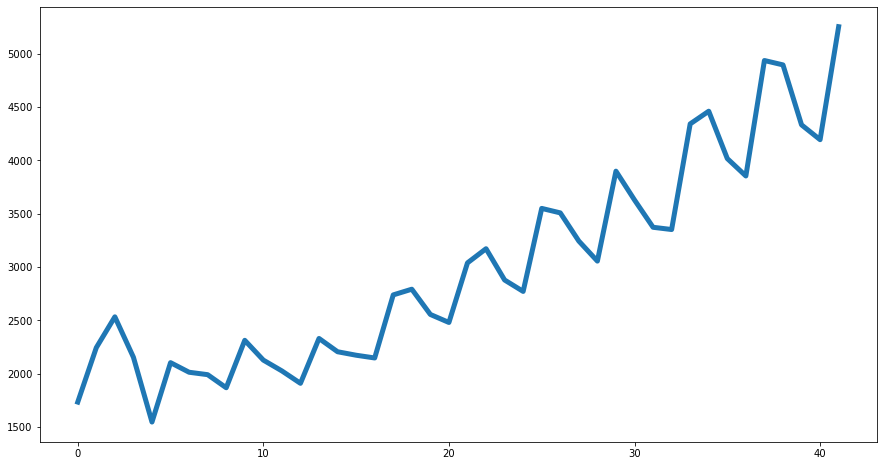

In [12]:
plt.figure(figsize=(15,8))
plt.plot(Cocacola_Data['Sales'],linewidth=5)

#### Let's,Check Autocorrelation

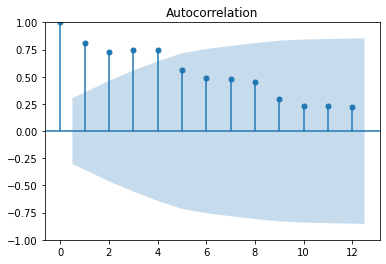

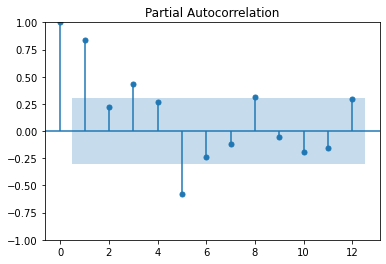

In [13]:
tsa_plots.plot_acf(Cocacola_Data.Sales,lags=12)
tsa_plots.plot_pacf(Cocacola_Data.Sales,lags=12)
plt.show()

###  Data Driven Forecasting Methods


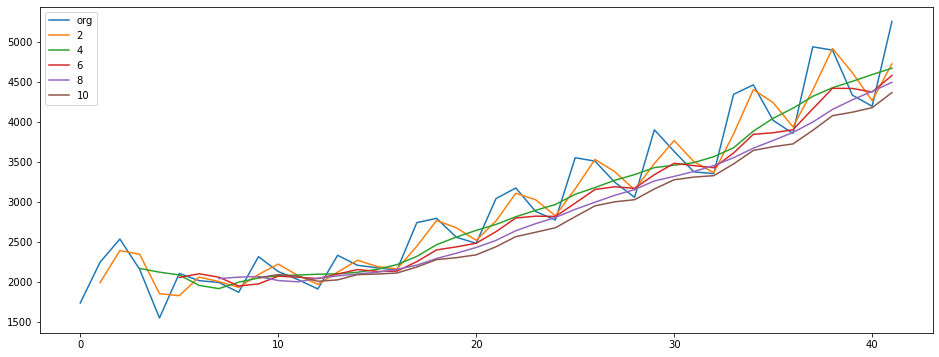

In [14]:
plt.figure(figsize=(16,6))
Cocacola_Data.Sales.plot(label="org")
for i in range (2,12,2):
    Cocacola_Data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Visualizing The Time Series Decomposition Plot

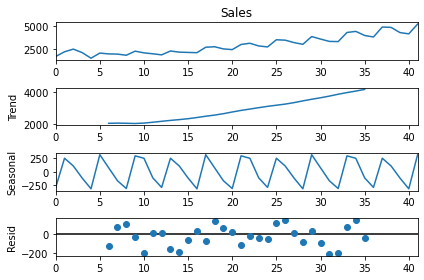

In [15]:
decompose_ts_add=seasonal_decompose(Cocacola_Data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

### Evaluation Mterics RMSE

In [16]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse


### Model Based Forecasting Method

##### We'll make a t,t squared & log sale column will make

In [17]:
Cocacola_Data["t"] = np.arange(1,43)
Cocacola_Data["t_squared"] = Cocacola_Data["t"]*Cocacola_Data["t"]

Cocacola_Data["log_sales"] = np.log(Cocacola_Data["Sales"])

Cocacola_Data.head()


,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


### Splitting Data into Training & Testing

In [18]:
Train=Cocacola_Data.head(38)
Test=Cocacola_Data.tail(4)

## Model Building & Model Training

### 1.Linear Model

In [23]:
Linear_Model=smf.ols('Sales~t',data=Train).fit()
pred_linear=pd.Series(Linear_Model.predict(pd.DataFrame(Test['t'])))
Rmse_Linear= RMSE(Test['Sales'],pred_linear)
Rmse_Linear

591.553295722396

### 2.Exponential Model

In [25]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_exp = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_exp

466.24797310672255

### 3.Quadratic Model

In [26]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_quad = RMSE(Test['Sales'], pred_Quad)
rmse_quad

475.56183518315254

### 4. Additive Seasonality Model

In [27]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

1860.0238154547276

### 5.Additive seasonality with linear trend

In [29]:
add_sea_lin = smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_lin = pd.Series(add_sea_lin.predict(Test[['t','Q1','Q2','Q3','Q4']]))
rmse_add_sea_lin = RMSE(Test['Sales'], pred_add_sea_lin)
rmse_add_sea_lin 

464.9829023982241

### Additive Seasonality Quadratic Model

In [30]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_quad 

301.73800719346673

### 6.Multiplicative Seasonality Model

In [31]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1963.3896400779686

### 7. Multiplicative seasonality with quadratic trend


In [32]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mul_add_sea = pd.Series(Mul_Add_sea .predict(Test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_Mul_add_sea = RMSE(Test['Sales'], np.exp(pred_Mul_add_sea))
rmse_Mul_add_sea

225.52439049826944

# Comparing All Models Error Values

In [36]:
list = [['Linear Mode',Rmse_Linear], ['Exp model',rmse_exp],
        ['Quad model',rmse_quad], ['add seasonality',rmse_add_sea],
        ['Linear add seasonality',rmse_add_sea_lin], ['Quad add seasonality',rmse_add_sea_quad],
        ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_add_sea]]


In [37]:
Data=pd.DataFrame(list,columns=['Model','RMSE_Value'])
Data

,Model,RMSE_Value
0,Linear Mode,591.553296
1,Exp model,466.247973
2,Quad model,475.561835
3,add seasonality,1860.023815
4,Linear add seasonality,464.982902
5,Quad add seasonality,301.738007
6,Mult Seasonality,1963.389640
7,Mult add seasonality,225.524390


### From the above models error value we can concluded that,we get Least RMSE value from Multi Additive Seasonality MOdel to build the final Model

# Final Model 

In [38]:
Final_Model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data = Cocacola_Data).fit()
Pred_Final = pd.Series(Final_Model.predict(Cocacola_Data[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_Final_Model = RMSE(Cocacola_Data['Sales'], Pred_Final)
rmse_Final_Model

159.05522576522475

In [43]:
pred_df = pd.DataFrame({'Actual' : Cocacola_Data.Sales, 'Predicted' : Pred_Final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709
